<a href="https://colab.research.google.com/github/nitin-khandagale/machine_learning_practice/blob/master/bag_of_words_on_blogpost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from bs4 import BeautifulSoup
import re

In [3]:
link = "https://www.hopefully.live/post/data-analysis-of-campus-placement-data"

In [4]:
import requests

In [5]:
urlc = requests.get(link)

In [6]:
soup = BeautifulSoup(urlc.content, 'html5')

In [7]:
div = soup.find_all('p')

In [8]:
para_data = []

for p in range(len(div)):
  para_data.append(div[p].get_text())

In [11]:
new_data = ''.join(para_data)
new_data

"Data Analysis is nothing but the telling a story through data. I am going to extract some useful information from campus placement data.You can download the data from here.I also tried answering questions asked on this data from kaggle. let's find out answers to these questionsWhich factor influenced a candidate in getting placed?Does percentage matters for one to get placed?Which degree specialization is much demanded by corporate?Play with the data conducting all statistical tests.I will first Explore the data through some charts then will get back to these questions.Lets have look at our dataStatus is target variable here which depends upon other independent feature. First column contains the genders of the candidates. Lets see the distribution of genders.Data has two Genders Males and Females out of which, more than 67% are males and 35% are female. But what is the distribution of Gender with respect to Placement Status ?The percentage of placement among males and females. Percent

In [12]:
new_data = re.sub('\W+', ' ', new_data)
new_data = re.sub('\d+', ' ', new_data)

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
words = word_tokenize(new_data)

In [49]:
words = [word.lower() for word in words]

In [50]:
words[:10]

['data',
 'analysis',
 'is',
 'nothing',
 'but',
 'the',
 'telling',
 'a',
 'story',
 'through']

In [51]:
len(words)

625

In [36]:
from nltk.corpus import stopwords
import collections

In [52]:
stop_words = stopwords.words('english')

In [53]:
cleaned_words = [word for word in words if not word in stop_words]

In [54]:
cleaned_words[:10]

['data',
 'analysis',
 'nothing',
 'telling',
 'story',
 'data',
 'going',
 'extract',
 'useful',
 'information']

In [55]:
len(cleaned_words)

359

In [56]:
word_count = {}

for w in cleaned_words:
  if w not in word_count.keys():
    word_count[w] = 1
  else:
    word_count[w] += 1

In [57]:
collections.Counter(word_count).most_common(10)

[('placed', 17),
 ('candidates', 13),
 ('data', 12),
 ('percentage', 8),
 ('one', 8),
 ('get', 8),
 ('lets', 8),
 ('placements', 7),
 ('see', 6),
 ('placement', 5)]

In [58]:
import heapq

top = heapq.nlargest(20, word_count, key=word_count.get)

In [59]:
top_counts = []
for u in top:
  top_counts.append(word_count[u])

In [60]:
top_counts

[17, 13, 12, 8, 8, 8, 8, 7, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3]

In [45]:
import matplotlib.pyplot as plt


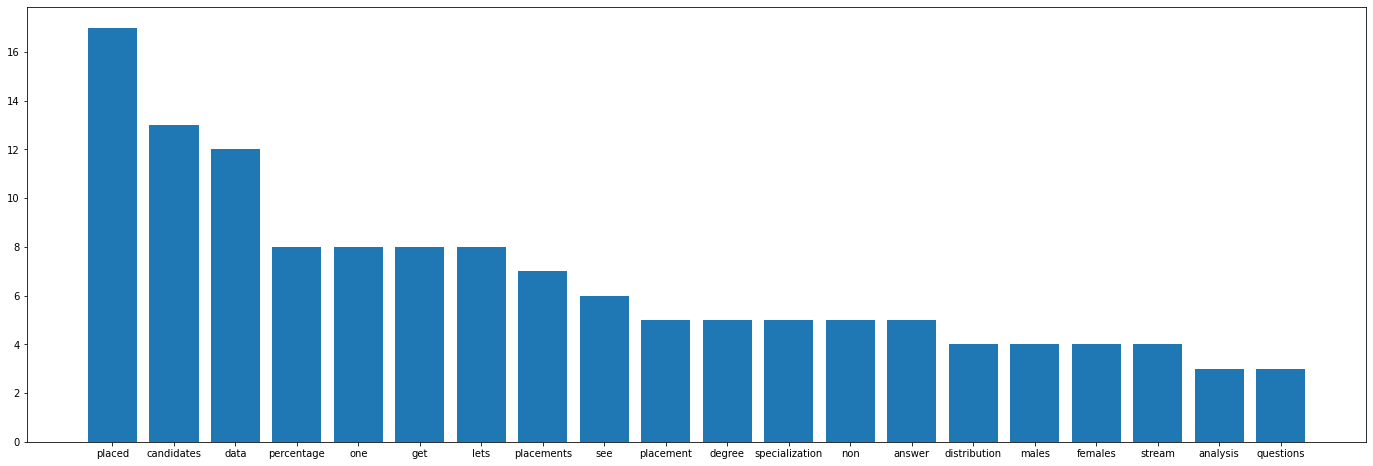

In [61]:
plt.figure(figsize=(24,8))
plt.bar(top, top_counts)
plt.show()